METADATA:
       Sample Condition
0  Kelley_17         C
1  Kelley_18         C
2  Kelley_19         C
3  Kelley_20         C
4  Kelley_21       mut
5  Kelley_22       mut
6  Kelley_23       mut
7  Kelley_24       mut 

Control sample IDs: ['Kelley_17', 'Kelley_18', 'Kelley_19', 'Kelley_20']
Mutant sample IDs: ['Kelley_21', 'Kelley_22', 'Kelley_23', 'Kelley_24'] 

Original read_count table shape: (32833, 33)
Columns in read_count table:
 ['gname', 'Kelley_1', 'Kelley_2', 'Kelley_3', 'Kelley_4', 'Kelley_5', 'Kelley_6', 'Kelley_7', 'Kelley_8', 'Kelley_9', 'Kelley_10', 'Kelley_11', 'Kelley_12', 'Kelley_13', 'Kelley_14', 'Kelley_15', 'Kelley_16', 'Kelley_17', 'Kelley_18', 'Kelley_19', 'Kelley_20', 'Kelley_21', 'Kelley_22', 'Kelley_23', 'Kelley_24', 'Kelley_25', 'Kelley_26', 'Kelley_27', 'Kelley_28', 'Kelley_29', 'Kelley_30', 'Kelley_31', 'Kelley_32']

Filtered read_count table shape: (25468, 8)
Filtered table columns: ['Kelley_17', 'Kelley_18', 'Kelley_19', 'Kelley_20', 'Kelley_21', 'Kelle

C:\Users\els851\AppData\Local\Temp\ipykernel_16288\3232559749.py:83: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.01 seconds.




DESeqDataSet before running DESeq2:
 AnnData object with n_obs × n_vars = 8 × 25468
    obs: 'Condition'
    obsm: 'design_matrix'
Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 2.52 seconds.

Fitting dispersion trend curve...
... done in 0.58 seconds.

Fitting MAP dispersions...
... done in 3.40 seconds.

Fitting LFCs...
... done in 2.52 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...



DESeqDataSet after running DESeq2:
 AnnData object with n_obs × n_vars = 8 × 25468
    obs: 'Condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    layers: 'normed_counts', '_mu_hat', 'cooks'


... done in 1.42 seconds.



Log2 fold change & Wald test p-value: Condition mut vs C
              baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
gname                                                                         
AT1G01010    35.485746        0.308731  0.512977  0.601841  0.547280  0.999659
AT1G01020   167.668357        0.063843  0.264234  0.241617  0.809077  0.999659
AT1G01030    11.641470        0.663598  0.828276  0.801180  0.423027  0.993644
AT1G01040   312.759591        0.046118  0.227402  0.202804  0.839288  0.999659
AT1G01050   467.577058        0.094828  0.200453  0.473067  0.636165  0.999659
...                ...             ...       ...       ...       ...       ...
AT5G67600  2289.428878        0.034002  0.193237  0.175963  0.860323  0.999659
AT5G67610    65.055661       -0.354259  0.361243 -0.980666  0.326757  0.982237
AT5G67620   274.197868        0.565568  0.287385  1.967977  0.049071  0.610881
AT5G67630    92.256716        0.618280  0.342825  1.803485  0.071312  0.69

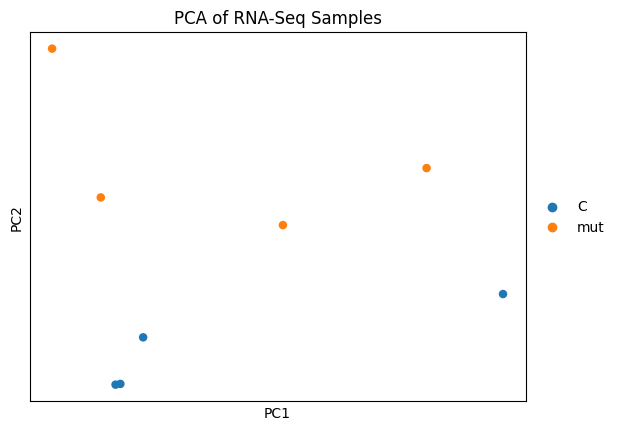

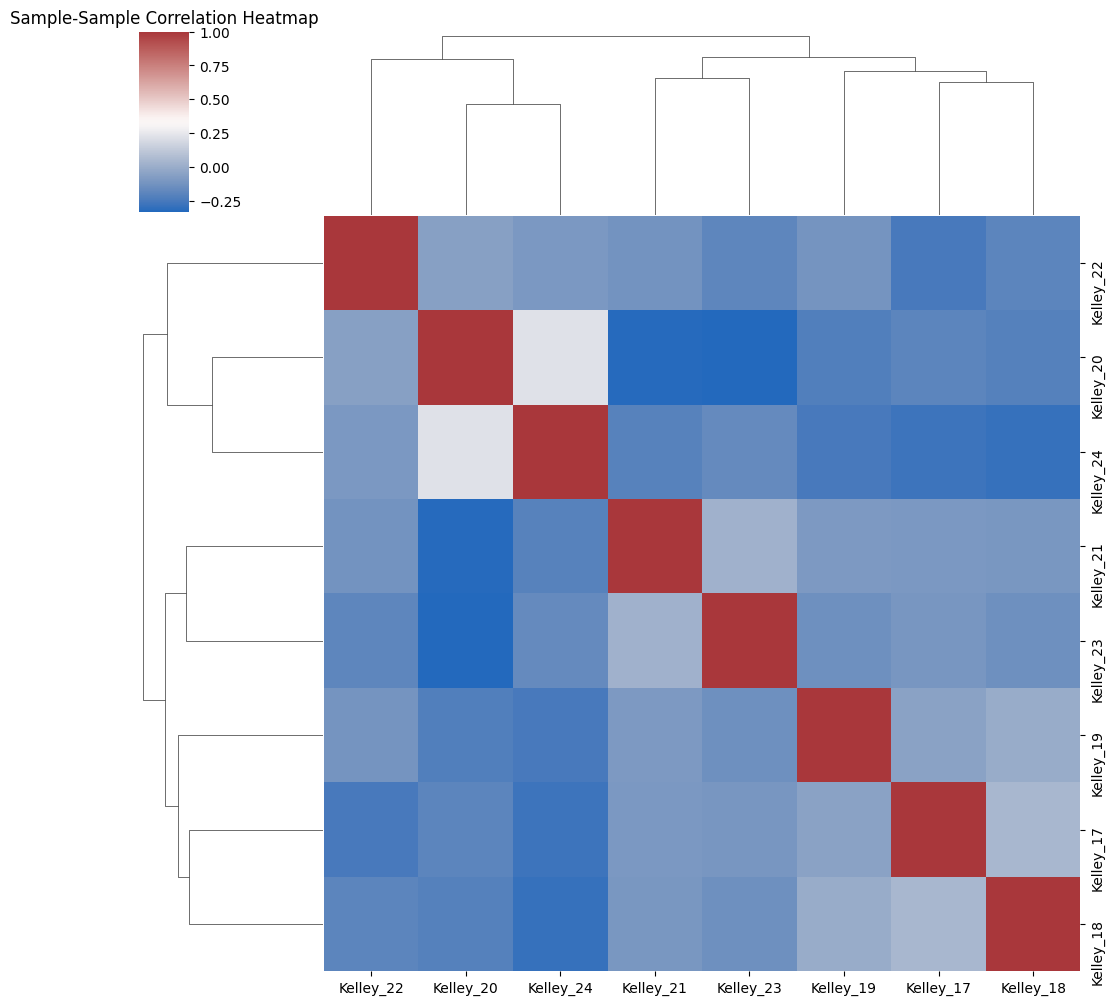

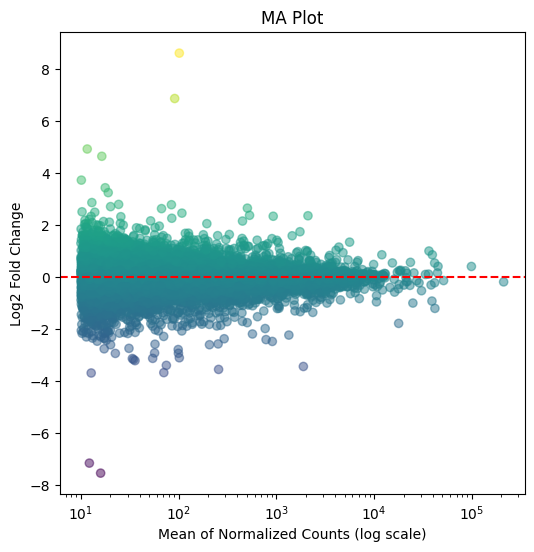

C:\Users\els851\AppData\Local\Temp\ipykernel_16288\3232559749.py:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res.rename(columns={"Symbol": "symbol"}, inplace=True)


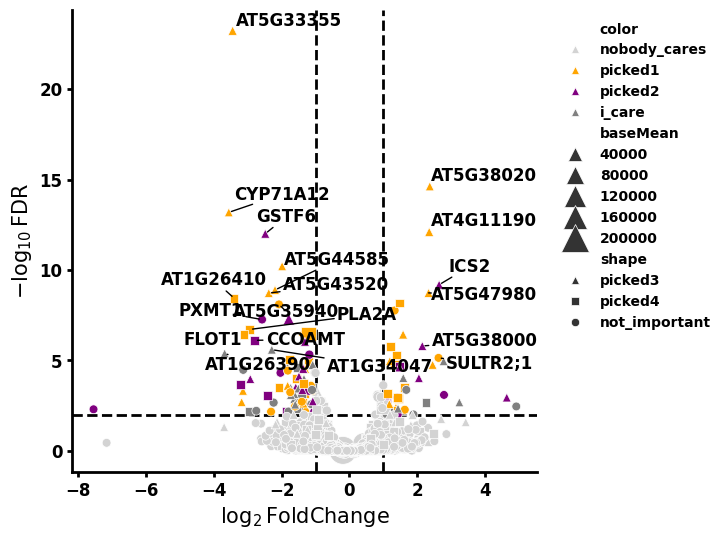


Analysis complete. Volcano plot has been saved as 'volcano.png'.
Found 332 significantly DE genes.


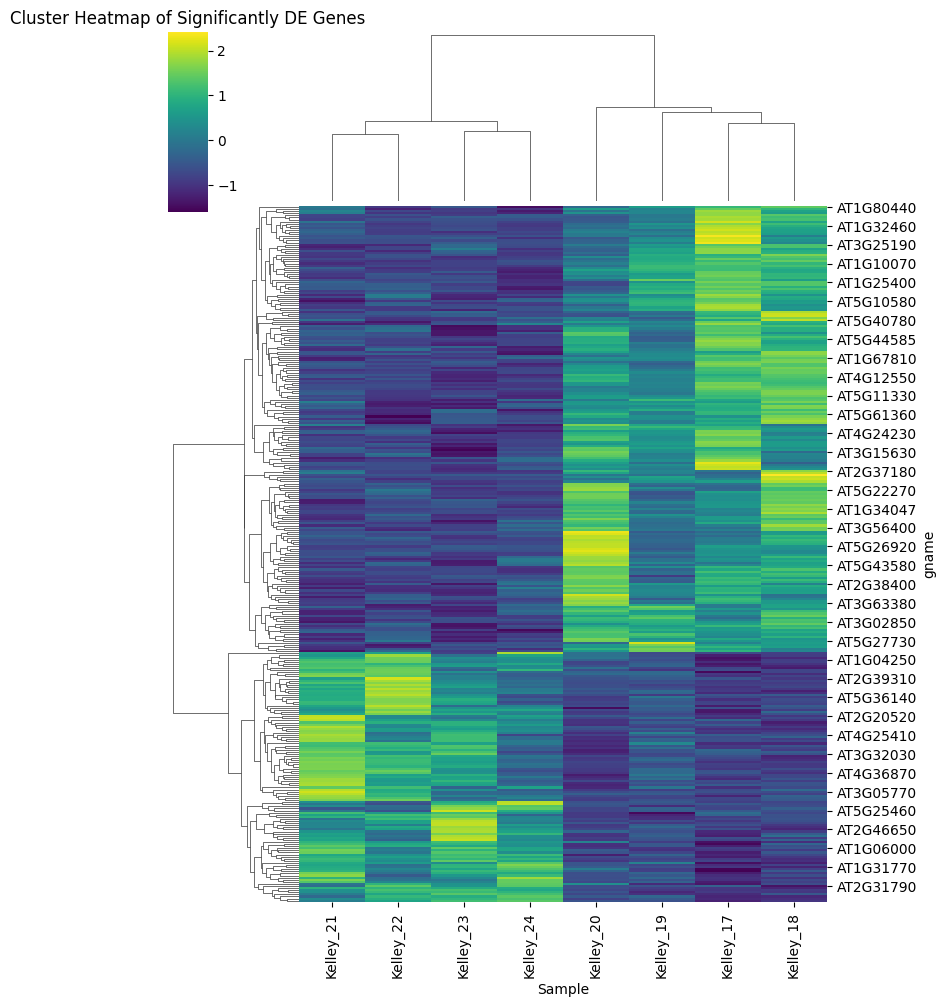

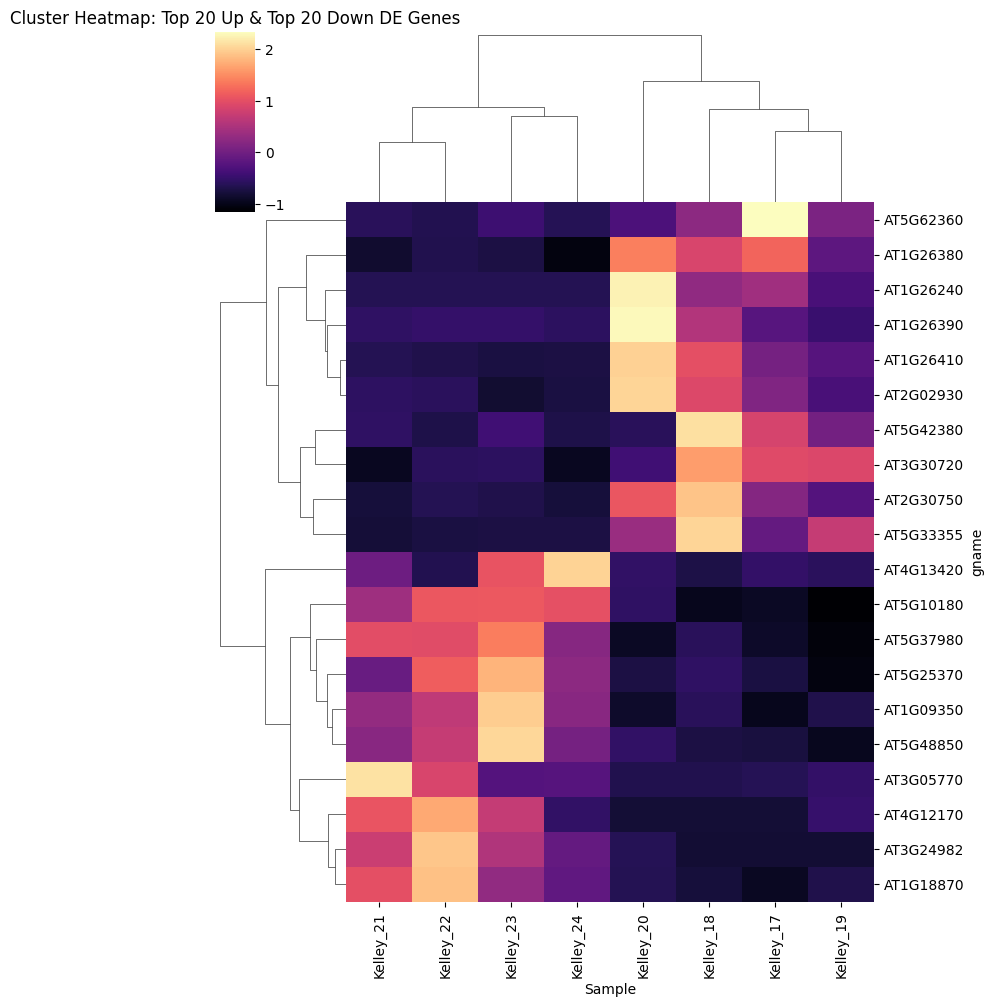

DE results saved to 'DE_results.csv'.


In [86]:
#!/usr/bin/env python
# coding: utf-8

"""
Example RNA-seq analysis script using pydeseq2, scanpy, and other libraries.

Usage:
    python rna_seq_analysis.py
"""

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc
import anndata

# PyDESeq2
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

# GSEA
import gseapy as gp
from gseapy.plot import gseaplot

############################################
# 1. Load and inspect metadata
############################################

metadata_dict = {
    "Sample": ["Kelley_17", "Kelley_18", "Kelley_19", "Kelley_20",
               "Kelley_21", "Kelley_22", "Kelley_23", "Kelley_24"],
    "Condition": ["C", "C", "C", "C",
                  "mut", "mut", "mut", "mut"]
}

metadata = pd.DataFrame(metadata_dict)
print("METADATA:\n", metadata, "\n")

# Define groups
control_samples = metadata.loc[metadata['Condition'] == 'C', 'Sample'].tolist()
mutant_samples  = metadata.loc[metadata['Condition'] == 'mut', 'Sample'].tolist()
print("Control sample IDs:", control_samples)
print("Mutant sample IDs:", mutant_samples, "\n")

############################################
# 2. Load your read‐count table
############################################

counts = pd.read_csv('read_counts_table.csv')
print("Original read_count table shape:", counts.shape)
print("Columns in read_count table:\n", list(counts.columns))

# Set the gene column as index
counts = counts.set_index('gname')

# Remove genes with 0 total counts across all samples
counts = counts[counts.sum(axis=1) > 0]

############################################
# 3. Filter the read_count table
#    to only columns specified in metadata
############################################

all_valid_columns = control_samples + mutant_samples
counts = counts[all_valid_columns]
print("\nFiltered read_count table shape:", counts.shape)
print("Filtered table columns:", list(counts.columns))

# Convert metadata to a suitable format for DESeq2
metadata.set_index('Sample', inplace=True)
metadata["Condition"] = metadata["Condition"].astype("category")
metadata["Condition"] = metadata["Condition"].cat.reorder_categories(["C", "mut"], ordered=True)

############################################
# 4. Create DESeqDataSet and run DESeq2
############################################

# PyDESeq2 expects sample counts in rows, genes in columns
# so transpose the `counts` DataFrame
counts_t = counts.T

dds = DeseqDataSet(
    counts=counts_t,
    metadata=metadata,
    design_factors=["Condition"]
)

print("\nDESeqDataSet before running DESeq2:\n", dds)

dds.deseq2()
print("\nDESeqDataSet after running DESeq2:\n", dds)

############################################
# 5. Obtain DE results
############################################

stat_res = DeseqStats(dds, contrast=["Condition", "mut", "C"])
results = stat_res.summary()

res = stat_res.results_df
print("\nDE results (head):\n", res.head())

############################################
# 6. Merge with annotation data
############################################

anno = pd.read_csv('Arabidopsis_gene_annotation.tsv', sep='\t')
anno.set_index('Nomenclature ID', inplace=True)

# Example of filtering out rows missing a Symbol
anno['keep'] = anno['Symbol'].index.isnull()
anno = anno.loc[anno['keep'] == False]  # keep only non-null Symbol

# Merge DE results with annotation
res_anno = pd.merge(
    left=res,
    right=anno,
    how="inner",
    left_index=True,
    right_index=True
)

# Add Symbol column to res
res['Symbol'] = res_anno['Symbol']
# Filter by baseMean
res = res[res.baseMean >= 10]

# Identify significant genes
sigs = res[(res.padj < 0.1) & (abs(res.log2FoldChange) > 0.5)]
print("\nSignificantly DE genes:\n", sigs)

############################################
# 7. Some exploratory data analysis
############################################

# Attempting PCA using scanpy
# Convert normalized counts to an AnnData object

# PyDESeq2 normalizes internally, but for demonstration we mimic these layers
# NOTE: If dds.layers["normed_counts"] does not exist, please see PyDESeq2 docs
try:
    norm_counts = dds.layers["normed_counts"]
except AttributeError:
    print("\n[Warning] 'dds.layers[\"normed_counts\"]' not found. "
          "Check if your PyDESeq2 version supports this.")
    norm_counts = None

if norm_counts is not None:
    # Build AnnData
    adata = anndata.AnnData(X=norm_counts, obs=dds.obs, var=pd.DataFrame(index=dds.var.index))
    adata.layers["counts"] = norm_counts
    adata.layers["log1p"] = np.log1p(norm_counts)

    sc.pp.scale(adata, max_value=10)
    sc.tl.pca(adata)
    sc.pl.pca(adata, color='Condition', size=150, show=False)
    plt.title("PCA of RNA-Seq Samples")
    plt.show()

    # Sample-Sample distance heatmap
    corr_matrix = np.corrcoef(norm_counts)
    sns.clustermap(
        corr_matrix,
        row_cluster=True, col_cluster=True,
        cmap="vlag",
        xticklabels=adata.obs.index, yticklabels=adata.obs.index
    )
    plt.title("Sample-Sample Correlation Heatmap")
    plt.show()

    # MA Plot
    plt.figure(figsize=(6, 6))
    plt.scatter(
        x=res['baseMean'], 
        y=res['log2FoldChange'],
        c=res['log2FoldChange'], alpha=0.5, cmap='viridis'
    )
    plt.xscale('log')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel("Mean of Normalized Counts (log scale)")
    plt.ylabel("Log2 Fold Change")
    plt.title("MA Plot")
    plt.show()



##############################################################################
# 6. VOLCANO PLOT
##############################################################################

# 6A. If your 'res' DataFrame does not have the lowercase "symbol" column, rename it:
res.rename(columns={"Symbol": "symbol"}, inplace=True)

# 6B. Drop NA rows, if any remain
res = res.dropna(subset=["padj", "symbol", "log2FoldChange", "baseMean"])

# 6C. Add -log10 FDR column
res["nlog10"] = -np.log10(res["padj"])

# For the color logic, create lists of picked genes. Replace as per your convinience
picked1 = random.choices(res.symbol.tolist(), weights=res.nlog10.tolist(), k=250)
picked2 = random.choices(res.symbol.tolist(), weights=res.nlog10.tolist(), k=300)
# Ensure no overlap
picked2 = [x for x in picked2 if x not in picked1]

# Map color categories
def map_color(a):
    log2FoldChange, symbol, nlog10 = a
    # Conditions for "nobody_cares"
    if abs(log2FoldChange) < 1 or nlog10 < 2:
        return "nobody_cares"
    # Check if symbol is in the user picks
    if symbol in picked1:
        return "picked1"
    if symbol in picked2:
        return "picked2"
    return "i_care"

res["color"] = res[["log2FoldChange", "symbol", "nlog10"]].apply(map_color, axis=1)

# For shape logic
picked3 = random.choices(res.symbol.tolist(), weights=res.nlog10.tolist(), k=250)
picked4 = random.choices(res.symbol.tolist(), weights=res.nlog10.tolist(), k=300)
picked4 = [x for x in picked4 if x not in picked3]

def map_shape(symbol):
    if symbol in picked3:
        return "picked3"
    if symbol in picked4:
        return "picked4"
    return "not_important"

res["shape"] = res.symbol.map(map_shape)

# 6D. Plot
plt.figure(figsize=(6, 6))
ax = sns.scatterplot(
    data=res,
    x="log2FoldChange",
    y="nlog10",
    hue="color",
    hue_order=["nobody_cares", "picked1", "picked2", "i_care"],
    palette=["lightgrey", "orange", "purple", "grey"],
    style="shape",
    style_order=["picked3", "picked4", "not_important"],
    markers=["^", "s", "o"],
    size="baseMean",
    sizes=(40, 400)
)

# Add cutoff lines
ax.axhline(2, zorder=0, c="k", lw=2, ls="--")
ax.axvline(1, zorder=0, c="k", lw=2, ls="--")
ax.axvline(-1, zorder=0, c="k", lw=2, ls="--")

# Label certain points
texts = []
for i in range(len(res)):
    row = res.iloc[i]
    # E.g., highlight the top significance and effect size
    if row.nlog10 > 5 and abs(row.log2FoldChange) > 2:
        texts.append(
            plt.text(
                x=row.log2FoldChange,
                y=row.nlog10,
                s=row.symbol,
                fontsize=12, weight="bold"
            )
        )

adjust_text(texts, arrowprops=dict(arrowstyle="-", color="k"))

plt.legend(loc=1, bbox_to_anchor=(1.4, 1), frameon=False, prop={"weight": "bold"})

# A bit of axis styling
for axis_side in ["bottom", "left"]:
    ax.spines[axis_side].set_linewidth(2)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(width=2)
plt.xticks(size=12, weight="bold")
plt.yticks(size=12, weight="bold")
plt.xlabel("$\\log_{2}$FoldChange", size=15)
plt.ylabel("$-\\log_{10}$FDR", size=15)

plt.savefig("volcano.png", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()

print("\nAnalysis complete. Volcano plot has been saved as 'volcano.png'.")





# 1) Identify significantly DE genes
sigs = res[(res["padj"] < 0.1) & (abs(res["log2FoldChange"]) > 0.5)].copy()
if len(sigs) == 0:
    print("No significantly DE genes found under current thresholds.")
else:
    print(f"Found {len(sigs)} significantly DE genes.")

# 2) From those significant genes, define top 20 up/down
top10_up = sigs.sort_values("log2FoldChange", ascending=False).head(10)
top10_down = sigs.sort_values("log2FoldChange", ascending=True).head(10)
top_genes = list(top10_up.index) + list(top10_down.index)

# 3) Extract the normalized counts from your dds object
#    Note: shape will be [samples x genes].
try:
    norm_counts = dds.layers["normed_counts"]
except AttributeError:
    raise ValueError("dds.layers['normed_counts'] not found. "
                     "Please ensure you're using a PyDESeq2 version "
                     "that provides normalized counts.")

# 4) Convert these counts to a pandas DataFrame
#    Rows = samples, Columns = genes
norm_counts_df = pd.DataFrame(
    data=norm_counts,
    index=dds.obs_names,       # sample IDs
    columns=dds.var.index      # gene IDs
)

###############################################################################
# HEATMAP A: All significant DE genes
###############################################################################
if len(sigs) > 0:
    # Subset the normalized counts to just significant genes
    norm_counts_sigs = norm_counts_df[sigs.index]

    # Create a cluster heatmap
    # By default, genes are rows and samples are columns.
    # If you prefer samples as rows, transpose the data with norm_counts_sigs_log.T
    sns.clustermap(norm_counts_sigs.T, z_score=0, cmap="viridis", figsize=(8, 10))
    plt.title("Cluster Heatmap of Significantly DE Genes")
    plt.savefig("heatmap_all_sig_genes.png", dpi=300, bbox_inches="tight")
    plt.show()

###############################################################################
# HEATMAP B: Top 20 up and top 20 down
###############################################################################
# (Only if your significant gene list has enough genes.)
if len(top_genes) > 0:
    norm_counts_top = norm_counts_df[top_genes]
    
    sns.clustermap(norm_counts_top.T, z_score=0, cmap="magma", figsize=(8, 10))
    plt.title("Cluster Heatmap: Top 20 Up & Top 20 Down DE Genes")
    plt.savefig("heatmap_top20_up_down.png", dpi=300, bbox_inches="tight")
    plt.show()


###############################################################################
# SAVE DE RESULTS TO CSV
###############################################################################
res.to_csv("DE_results.csv")  # <--- This line saves the final DE results to a CSV file
print("DE results saved to 'DE_results.csv'.")